# Imports

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
import pandas as pd

# Récupérer les données

x_train shape: (60000, 28, 28, 1) , train samples: 60000 , test samples: 10000


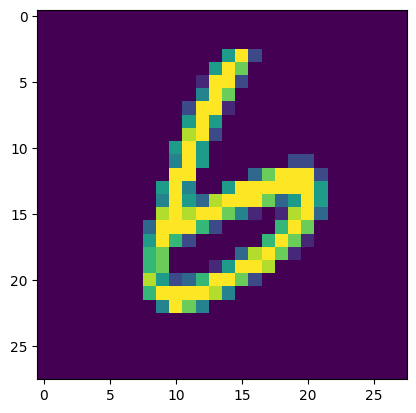

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(image_train, label_train), (image_test, label_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = image_train.astype("float32") / 255
x_test = image_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(image_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape,", train samples:" , x_train.shape[0], ", test samples:",x_test.shape[0])

image_index = random.randint(0,x_train.shape[0])
plt.imshow(x_train[image_index])
plt.show()

Les images du dataset sont en fait des matrices de 28x28 qui contiennent donc 255 données. Chaque données sont un chiffre de 0 a 9.
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1
De plus on utilisers l'encodage one-hot pour nos labels.
Le label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.

On normalise les données d'entrainement et on transforme les labels en vecteur de taille 10.

In [5]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

#Passage en one-hot
y_train = keras.utils.to_categorical(label_train)
y_test = keras.utils.to_categorical(label_test)

On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

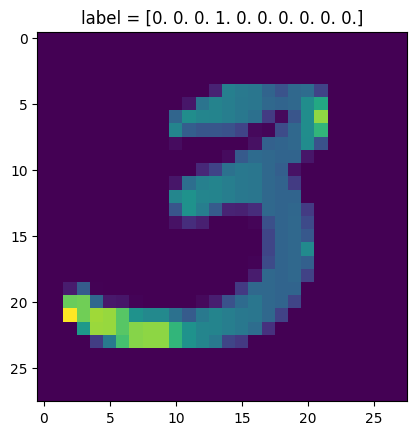

In [6]:
index = random.randint(0,len(x_train))
plt.imshow(x_train[index])
plt.title("label = " + str(y_train[index]))
plt.show()

# Fonctions utilitaires
Nous créons quelques fonctions qui nous serons utiles plus tard :
- une pour afficher la performance du model en fonction du nombre d'epoch
- un pour entrainer le model

In [7]:
def createGraph(history,num_of_layer):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy with ' + str(num_of_layer) + ' layers')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss with ' + str(num_of_layer) + ' layers')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper right')
    plt.show()

In [8]:
def modelTraining(model,train_data,train_label,validation_data,validation_labels,epochs=3,batch_size=32):
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(train_data,train_label,epochs=epochs,batch_size=batch_size,validation_data=(validation_data,validation_labels))
    createGraph(history,len(model.layers)-1)

# Model avec 0 couche cachée
On commence pour tester le model de base un model sans "hidden layers". La couche de sortie sera toujours de 10 car il y a 10 chiffres possibles.

Vu que les données d'entrées sont des matrice de 28x28 on doit les reduire en un vector, qui sera de taille 784. On utilise pour cela "layers.flatten"

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5636 - accuracy: 0.8641 - val_loss: 0.3416 - val_accuracy: 0.9081
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.9049 - val_loss: 0.3122 - val_accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3114 - accuracy: 0.9122 - val_loss: 0.2995 - val_accuracy: 0.9194
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.9161 - val_loss: 0.2919 - val_accuracy: 0.9204
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.9183 - val_loss: 0.2896 - val_accuracy: 0.9206


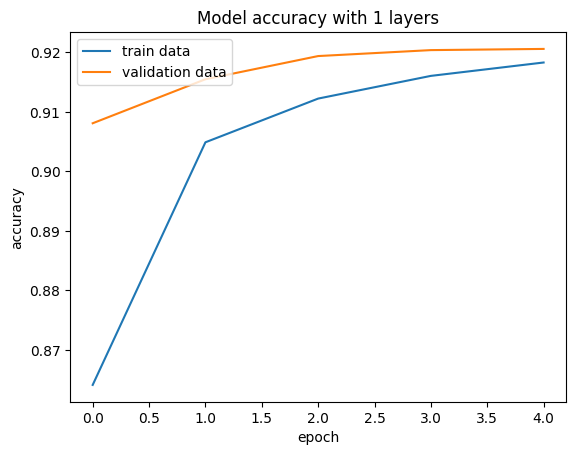

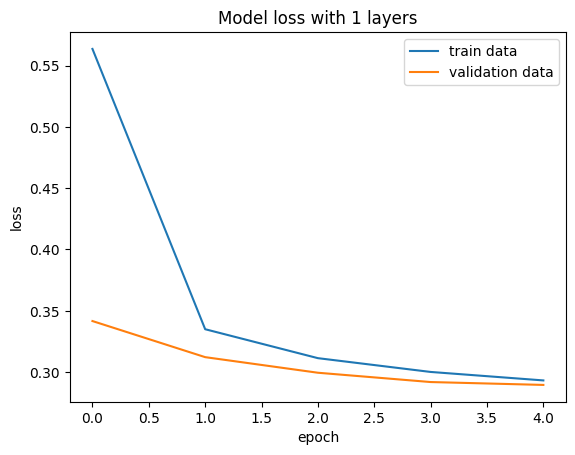

In [9]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 1 couche cachée


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3059 - accuracy: 0.9143 - val_loss: 0.1777 - val_accuracy: 0.9486
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1510 - accuracy: 0.9558 - val_loss: 0.1317 - val_accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1101 - accuracy: 0.9672 - val_loss: 0.1119 - val_accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.1023 - val_accuracy: 0.9684
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0736 - accuracy: 0.9782 - val_loss: 0.0937 - val_accuracy: 0.9736


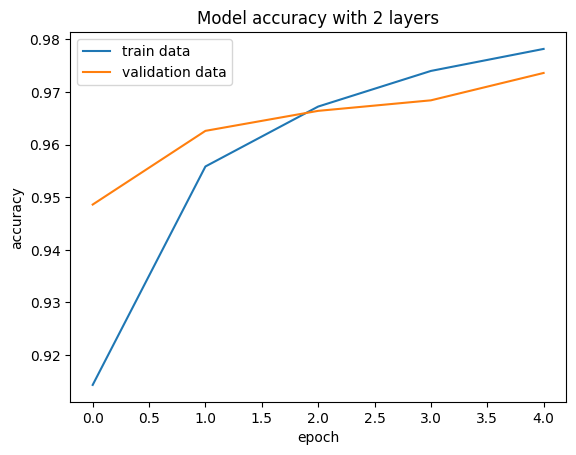

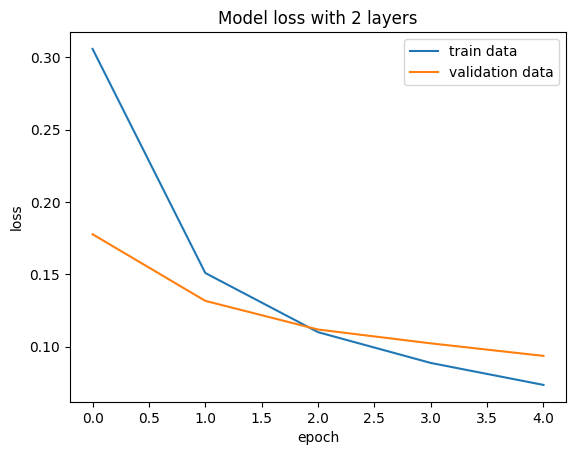

In [10]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 2 couches cachées

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2618 - accuracy: 0.9233 - val_loss: 0.1296 - val_accuracy: 0.9605
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.1210 - val_accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0825 - accuracy: 0.9755 - val_loss: 0.0985 - val_accuracy: 0.9708
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0658 - accuracy: 0.9808 - val_loss: 0.0915 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.0883 - val_accuracy: 0.9764


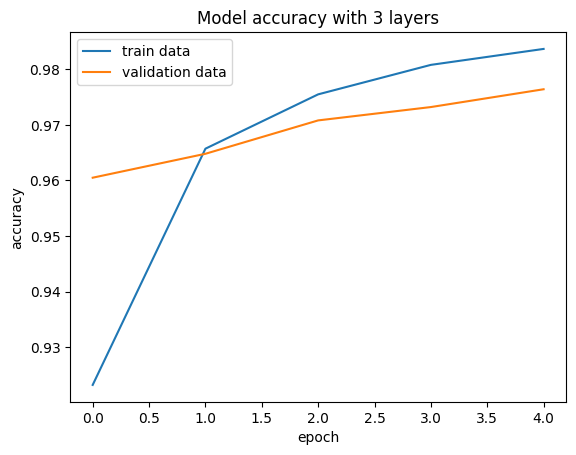

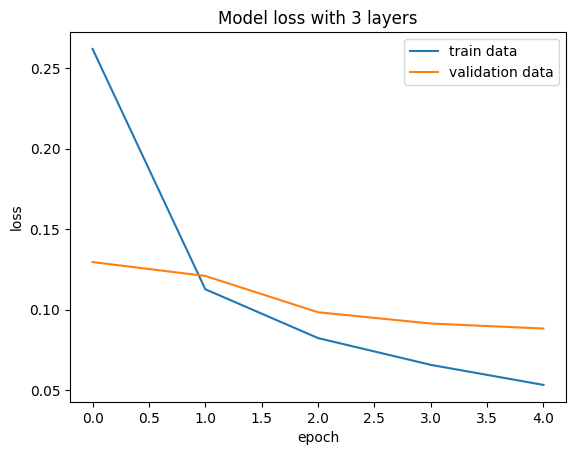

In [11]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

In [12]:
prediction = model.predict(image_test)
print(pd.crosstab(label_test,prediction.argmax(axis=1),colnames=["Prédiction"], margins=True))

313/313 [==============================] - 1s 2ms/step
Prédiction    0     1     2     3    4    5    6     7    8     9    All
row_0                                                                   
0           971     0     2     0    1    0    2     1    2     1    980
1             0  1130     0     1    0    0    3     0    1     0   1135
2             7    10   983     1    7    0    3    14    5     2   1032
3             0    14    10   970    0    1    0     6    4     5   1010
4             0    20     2     0  939    0    5     1    1    14    982
5             3    17     0    23    3  799   25     1   14     7    892
6             1     2     0     1    9    2  942     0    1     0    958
7             2    38     3     0    3    0    0   972    4     6   1028
8             4    21     5     2    5    1    3     1  930     2    974
9             2    15     0     3   11    1    1    10    2   964   1009
All         990  1267  1005  1001  978  804  984  1006  964  1001  10

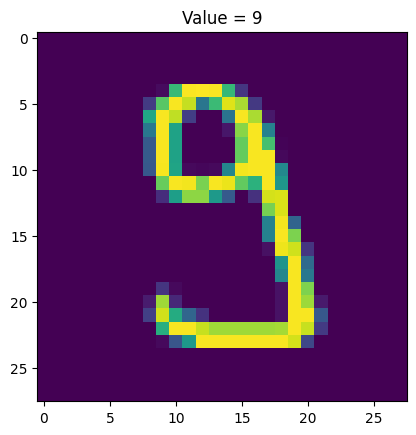

La valeur de prédiction est : 3
La liste des probabilitées est la suivante :
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
pred = pd.DataFrame({"true_val" : label_test, "pred_val" : prediction.argmax(axis=1)})
false_pred = pred[pred["true_val"] != pred["pred_val"]]
false_num = random.choice(false_pred.index)
plt.imshow(image_test[false_num])
plt.title("Value = " + str(label_test[false_num]))
plt.show()
print("La valeur de prédiction est : " + str(prediction[false_num].argmax()))
print("La liste des probabilitées est la suivante :")
print(np.round(prediction[false_num],3))

# Model avec 1 couche de convolution

Les réseau de neurones à convolution reprennent la principe de convolution en traitement de l'image. Pour ce faire nous avons une image de taille n x m (dans notre cas 28 x 28) et un ou plusieurs kernels (ici on en utilise 32) qui sont des matrices de taille i x j (dans notre cas 3 x 3).

En sortie d'une opération de convolution nous obtenons un matrice de taille (n-i+1) x (m-j+1). Cependant, ce n'est pas ce que renvoie le layer. Un convolutional layer prend en entrée un tenseur de dimension 3, hauteur, largeur, nombre de superpostion(dans keras il y a un dimension supplémentaire correspondant à la taille du batch) et renvoie en sortie un tenseur de dimension 3, hauteur, largeur, nombre de kernels. Le convolutional layer va donc renvoyer la liste des images obtenue pour chaque kernel sachant que chaque kernel prend toutes les images d'entrée.

Une convolutional layer est souvent suivi d'une maxpooling layer. Son but est de réduire le nombre de calcul à la sortie d'une convolutional layer ainsi que de diminuer les chances de sur apprentissage. Pour se faire elle va découper l'image en petite tuile (dans notre cas les tuiles sont de taille 2 x 2) puis créer une nouvelle image en ne gardant que la valeur maximal de chaque. Nous avons donc une image plus petite en sortie.

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3709 - accuracy: 0.8934 - val_loss: 0.2217 - val_accuracy: 0.9359
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2086 - accuracy: 0.9390 - val_loss: 0.1468 - val_accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1701 - accuracy: 0.9507 - val_loss: 0.1236 - val_accuracy: 0.9658
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1491 - accuracy: 0.9567 - val_loss: 0.1058 - val_accuracy: 0.9709
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1378 - accuracy: 0.9599 - val_loss: 0.0987 - val_accuracy: 0.9709


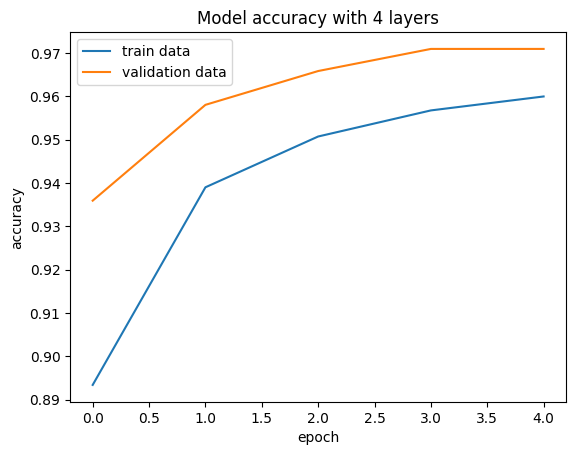

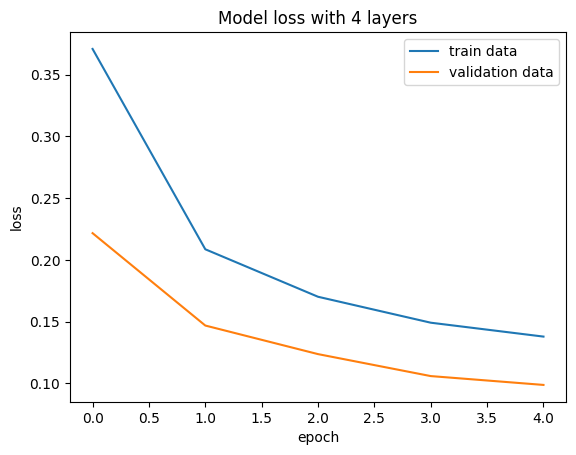

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dropout(0.5), # prevent from overfitting
        keras.layers.Dense(num_classes, activation="softmax"), # output layer
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)

En regardant les graphique on remarque que nous avons des résultats comparable à ceux du réseau à une couche classique sauf que les performances sur les données de validation sur supérieur à celle sur les données d'entrainement. Nous n'avons donc plus de problème de surapprentissage.

# Model avec 2 couches de convolution

Dans ce deuxième réseau convolutif, nous avons ajouté une seconde couche de convolution avec 64 kernel. Cela nous permet d'avoir en sortie des performance amélioré par rapport au réseau de neuronne précédent.

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2514 - accuracy: 0.9240 - val_loss: 0.0828 - val_accuracy: 0.9755
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1029 - accuracy: 0.9685 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0801 - accuracy: 0.9753 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 4/5
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0406 - val_accuracy: 0.9866
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0410 - val_accuracy: 0.9861


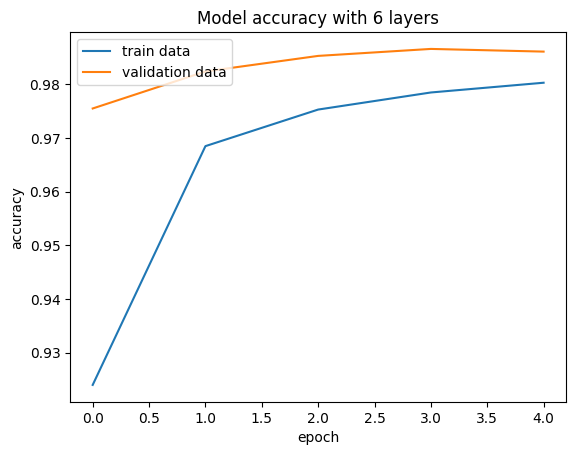

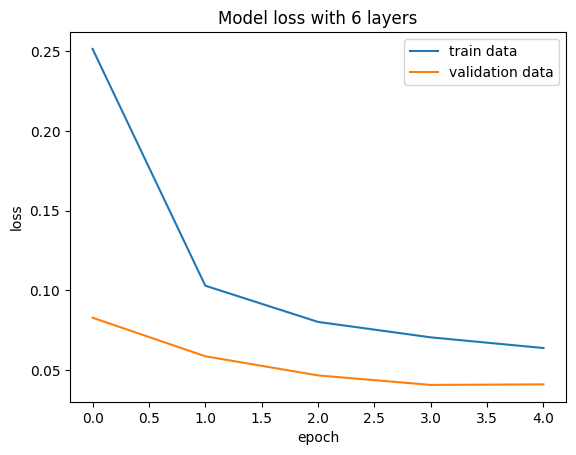

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dropout(0.5), # prevent from overfitting
        keras.layers.Dense(num_classes, activation="softmax"), # output layer
    ]
)

modelTraining(model,x_train, y_train,x_test,y_test,5)